In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as sm
import statsmodels.api as smf
%matplotlib inline

In [ ]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from utils.logistics_functions import *
from utils.Run_LCA_model import Run_LCA_model

In [64]:
Energy_urine = pd.read_csv('results/Energy_m3_optimal_Urine.csv')
GHG_urine = pd.read_csv('results/GHG_m3_optimal_Urine.csv')
Cost_urine = pd.read_csv('results/Cost_m3_optimal_Urine.csv')

In [54]:
Energy_urine = pd.read_csv('results/Energy_m3_optimal_Urine_everyday.csv')
GHG_urine = pd.read_csv('results/GHG_m3_optimal_Urine_everyday.csv')
Cost_urine = pd.read_csv('results/Cost_m3_optimal_Urine_everyday.csv')

In [66]:
Result_Energy_m3_plot = Energy_urine.drop('sum',1).drop('n_facilities',1).drop('Unnamed: 0',1)
Result_GHG_m3_plot = GHG_urine.drop('sum',1).drop('n_facilities',1).drop('Unnamed: 0',1)
Result_COST_m3_plot = Cost_urine.drop('sum',1).drop('n_facilities',1).drop('Labor',1).drop('Unnamed: 0',1)

In [67]:
Result_Energy_m3_plot['Renting facility space'] = 0
Result_GHG_m3_plot['Renting facility space'] = 0

In [69]:
Result_Energy_m3_plot['other'] = Result_Energy_m3_plot['Tank manufacturing']+Result_Energy_m3_plot['Trucks manufacturing']+Result_Energy_m3_plot['Material transport']
Result_GHG_m3_plot['other'] = Result_GHG_m3_plot['Tank manufacturing']+Result_GHG_m3_plot['Trucks manufacturing']+Result_GHG_m3_plot['Material transport']
Result_COST_m3_plot['other'] = Result_COST_m3_plot['Tank manufacturing']+Result_COST_m3_plot['Trucks manufacturing']+Result_COST_m3_plot['Material transport']

In [70]:
Result_Energy_m3_plot_ = Result_Energy_m3_plot.drop('Tank manufacturing',1).drop('Trucks manufacturing',1).drop('Material transport',1)
Result_GHG_m3_plot_ = Result_GHG_m3_plot.drop('Tank manufacturing',1).drop('Trucks manufacturing',1).drop('Material transport',1)
Result_COST_m3_plot_ = Result_COST_m3_plot.drop('Tank manufacturing',1).drop('Trucks manufacturing',1).drop('Material transport',1)

In [71]:
colors = ['#F6FAF5', '#449B52', '#0D4F0E']

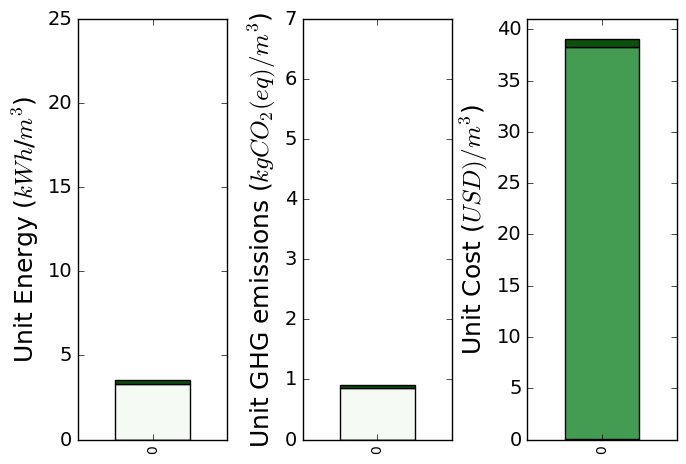

In [72]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,3, 1)
a=Result_Energy_m3_plot_.plot(kind='bar', stacked = True, ax=ax, legend=False,color=colors)
plt.yticks(fontsize=14)
plt.ylim(0, 25)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=18)
ax = fig.add_subplot(1,3, 2)
c=Result_GHG_m3_plot_.plot(kind='bar', stacked = True, ax=ax, legend=False,color=colors)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
plt.ylim(0, 7)
plt.yticks(fontsize=14)
ax = fig.add_subplot(1,3, 3)
d=Result_COST_m3_plot_.plot(kind='bar', stacked = True, ax=ax, legend=False,color=colors)
plt.ylim(0, 41)
plt.yticks(fontsize=14)
fig.tight_layout()
plt.ylabel('Unit Cost ($USD)/m^3$)',fontsize=18)
#d.legend(loc='lower center', bbox_to_anchor=(-1.3, 1.15),ncol=1, fancybox=True, shadow=True,fontsize=13)